# step 1:Data Preparation

In [11]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = 'inaugural_files.zip'
extract_dir = '/inaugural_files/'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Unzip the files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files in the extraction directory
extracted_files = os.listdir(extract_dir)
extracted_files

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

# Step 2:Lexical Diversity

In [28]:
from nltk.tokenize import word_tokenize
ttr_dict = {}

# Loop through each file to calculate its TTR
for file in extracted_files:
    try:
        with open(os.path.join(extract_dir, file), 'r', encoding='utf-8') as f:
            text = f.read()
    except UnicodeDecodeError:
        # Try reading with a different encoding if UTF-8 fails
        with open(os.path.join(extract_dir, file), 'r', encoding='latin-1') as f:
            text = f.read()
        
    # Tokenize the text into words
    words = word_tokenize(text.lower())
        
    # Calculate the TTR
    num_unique_words = len(set(words))
    total_words = len(words)
    ttr = num_unique_words / total_words if total_words > 0 else 0
        
    # Store the TTR
    ttr_dict[file[:-4]] = ttr  # Removing '.txt' from the filename

# Sort the dictionary by year for easier visualization
ttr_dict_sorted = {k: v for k, v in sorted(ttr_dict.items(), key=lambda item: int(item[0].split('-')[0]))}

ttr_dict_sorted

{'1789-Washington': 0.3929733246584255,
 '1793-Washington': 0.6462585034013606,
 '1797-Adams': 0.31070597362296354,
 '1801-Jefferson': 0.3563636363636364,
 '1805-Jefferson': 0.32843343133137337,
 '1809-Madison': 0.41554321966693103,
 '1813-Madison': 0.40168970814132104,
 '1817-Monroe': 0.2678085916258836,
 '1821-Monroe': 0.24728761514841352,
 '1825-Adams': 0.30781448538754763,
 '1829-Jackson': 0.41721854304635764,
 '1833-Jackson': 0.3788476716653512,
 '1837-VanBuren': 0.30408653846153844,
 '1841-Harrison': 0.19903551074090312,
 '1845-Polk': 0.24441017733230533,
 '1849-Taylor': 0.41256366723259763,
 '1853-Pierce': 0.3080516625446551,
 '1857-Buchanan': 0.2917341977309562,
 '1861-Lincoln': 0.255005005005005,
 '1865-Lincoln': 0.43902439024390244,
 '1869-Grant': 0.3829268292682927,
 '1873-Grant': 0.3591310251188052,
 '1877-Hayes': 0.2988548208348725,
 '1881-Garfield': 0.30610972568578554,
 '1885-Cleveland': 0.35733919736118747,
 '1889-Harrison': 0.2770956816257409,
 '1893-Cleveland': 0.3730

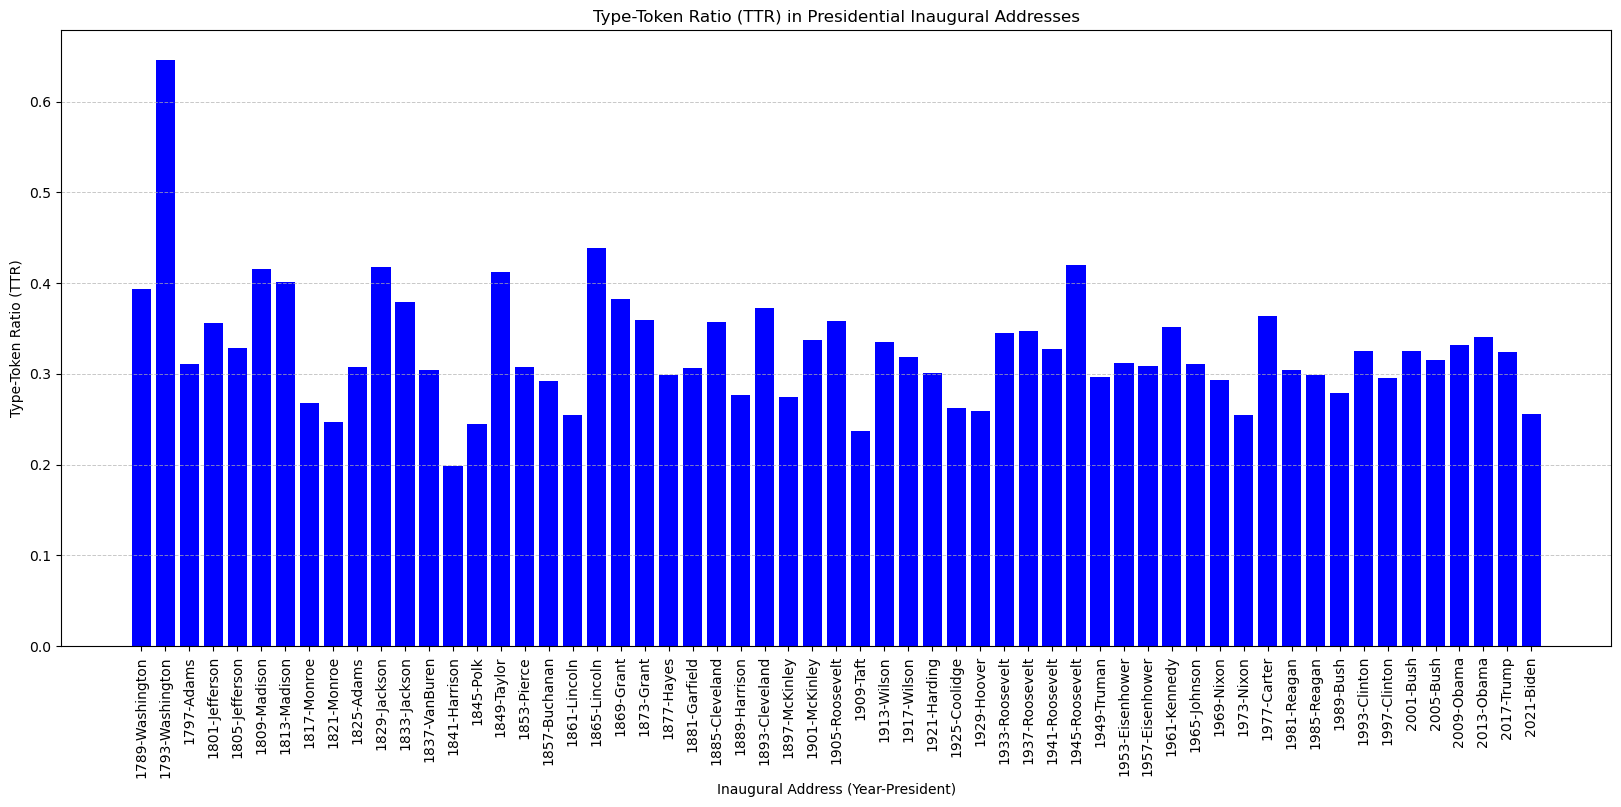

In [29]:
import matplotlib.pyplot as plt

# Plot the TTR over time
plt.figure(figsize=(20, 8))
plt.bar(ttr_dict_sorted.keys(), ttr_dict_sorted.values(), color='blue')
plt.xticks(rotation=90)
plt.xlabel('Inaugural Address (Year-President)')
plt.ylabel('Type-Token Ratio (TTR)')
plt.title('Type-Token Ratio (TTR) in Presidential Inaugural Addresses')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

# Step 2: Sentence Structure and Complexity

In [30]:
from nltk.tokenize import sent_tokenize

# Initialize a dictionary to store the average sentence length for each speech
avg_sent_len_dict = {}

# Loop through each file to calculate its average sentence length
for file in extracted_files:
    try:
        with open(os.path.join(extract_dir, file), 'r', encoding='utf-8') as f:
            text = f.read()
    except UnicodeDecodeError:
        # Try reading with a different encoding if UTF-8 fails
        with open(os.path.join(extract_dir, file), 'r', encoding='latin-1') as f:
            text = f.read()
            
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    
    # Calculate the average sentence length
    total_sentences = len(sentences)
    total_words = len(re.findall(r'\b\w+\b', text))
    avg_sent_len = total_words / total_sentences if total_sentences > 0 else 0
    
    # Store the average sentence length
    avg_sent_len_dict[file[:-4]] = avg_sent_len  # Removing '.txt' from the filename

# Sort the dictionary by year for easier visualization
avg_sent_len_dict_sorted = {k: v for k, v in sorted(avg_sent_len_dict.items(), key=lambda item: int(item[0].split('-')[0]))}

avg_sent_len_dict_sorted

{'1789-Washington': 62.21739130434783,
 '1793-Washington': 33.75,
 '1797-Adams': 62.75675675675676,
 '1801-Jefferson': 42.24390243902439,
 '1805-Jefferson': 48.17777777777778,
 '1809-Madison': 56.04761904761905,
 '1813-Madison': 36.696969696969695,
 '1817-Monroe': 27.688524590163933,
 '1821-Monroe': 34.74418604651163,
 '1825-Adams': 39.41891891891892,
 '1829-Jackson': 45.12,
 '1833-Jackson': 40.58620689655172,
 '1837-VanBuren': 40.48421052631579,
 '1841-Harrison': 40.32857142857143,
 '1845-Polk': 31.464052287581698,
 '1849-Taylor': 49.59090909090909,
 '1853-Pierce': 32.15384615384615,
 '1857-Buchanan': 31.865168539325843,
 '1861-Lincoln': 26.955555555555556,
 '1865-Lincoln': 27.115384615384617,
 '1869-Grant': 28.3,
 '1873-Grant': 31.186046511627907,
 '1877-Hayes': 42.25423728813559,
 '1881-Garfield': 26.954954954954953,
 '1885-Cleveland': 38.40909090909091,
 '1889-Harrison': 28.03184713375796,
 '1893-Cleveland': 34.96551724137931,
 '1897-McKinley': 30.584615384615386,
 '1901-McKinley':

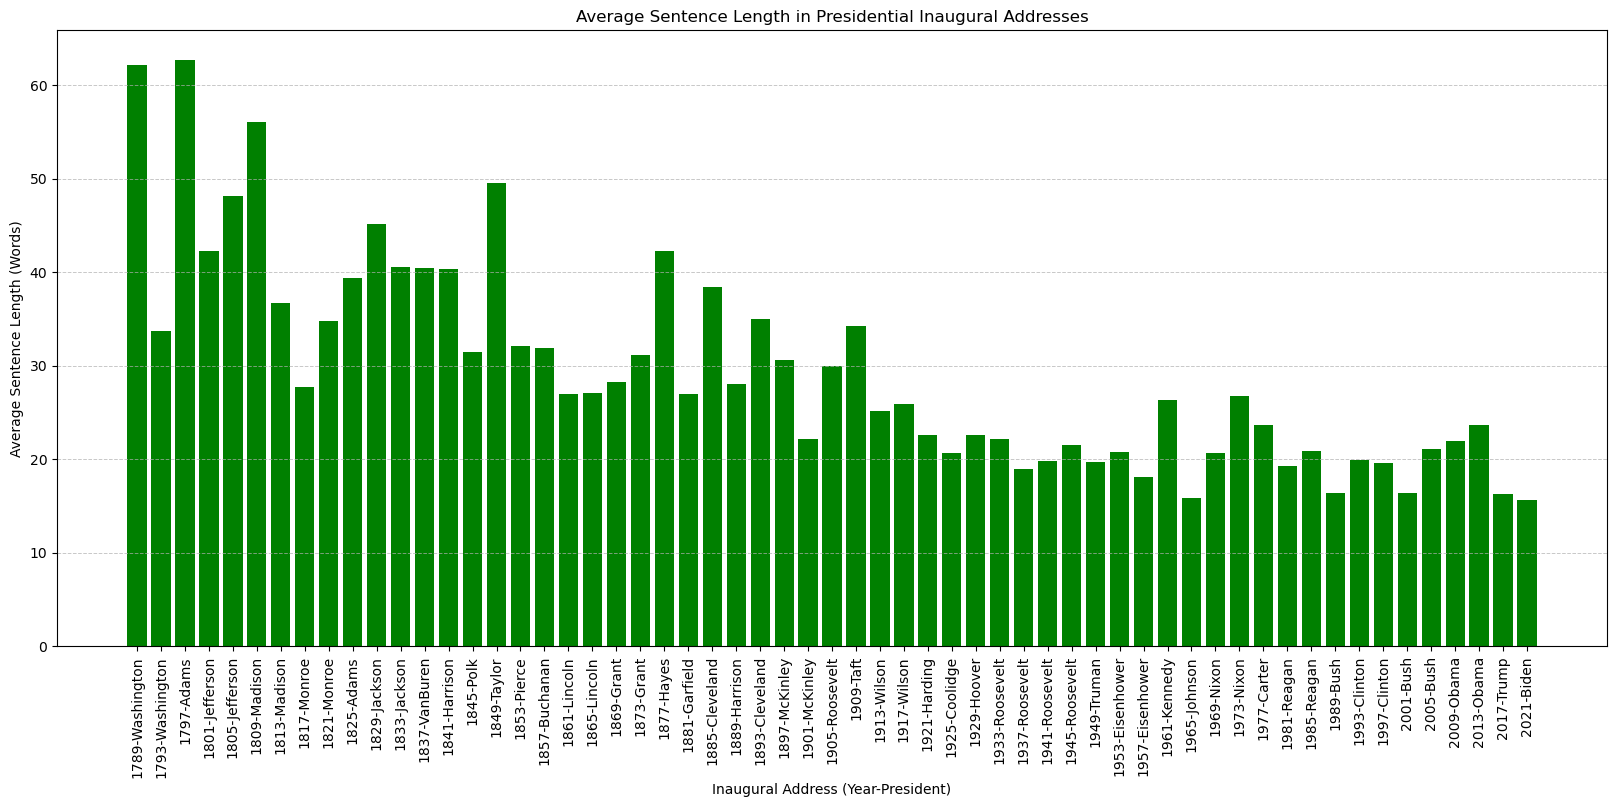

In [31]:
# Plot the average sentence length over time
plt.figure(figsize=(20, 8))
plt.bar(avg_sent_len_dict_sorted.keys(), avg_sent_len_dict_sorted.values(), color='green')
plt.xticks(rotation=90)
plt.xlabel('Inaugural Address (Year-President)')
plt.ylabel('Average Sentence Length (Words)')
plt.title('Average Sentence Length in Presidential Inaugural Addresses')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

# Step 3: Rhetorical Devices

In [32]:
# Initialize dictionaries to store counts of rhetorical devices for each selected speech
metaphor_count_dict = {}
simile_count_dict = {}
anaphora_count_dict = {}

# Define the selected years and corresponding Presidents for analysis
selected_years_presidents = ['1789-Washington', '1865-Lincoln', '1961-Kennedy', '2001-Bush', '2021-Biden']

# Helper function to count the occurrence of a regex pattern in a text
def count_occurrences(pattern, text):
    return len(re.findall(pattern, text, re.IGNORECASE))

# Regular expressions for identifying rhetorical devices
metaphor_pattern = r'\bis\b'  # Simplified pattern; metaphors often use "is" to equate two different things
simile_pattern = r'\blike\b|\bas\b'  # Similes often use "like" or "as" for comparisons
anaphora_pattern = r'(\b\w+\b)(?:\W+\w+){1,5}\W+\1'  # Anaphora is the repetition of a word within a short span

# Loop through each selected file to count occurrences of rhetorical devices
for year_president in selected_years_presidents:
    file_name = f"{year_president}.txt"
    try:
        with open(os.path.join(extract_dir, file_name), 'r', encoding='utf-8') as f:
            text = f.read()
    except UnicodeDecodeError:
        # Try reading with a different encoding if UTF-8 fails
        with open(os.path.join(extract_dir, file_name), 'r', encoding='latin-1') as f:
            text = f.read()
            
    # Count occurrences of each rhetorical device and store in respective dictionaries
    metaphor_count_dict[year_president] = count_occurrences(metaphor_pattern, text)
    simile_count_dict[year_president] = count_occurrences(simile_pattern, text)
    anaphora_count_dict[year_president] = count_occurrences(anaphora_pattern, text)

metaphor_count_dict, simile_count_dict, anaphora_count_dict

({'1789-Washington': 7,
  '1865-Lincoln': 6,
  '1961-Kennedy': 7,
  '2001-Bush': 31,
  '2021-Biden': 29},
 {'1789-Washington': 14,
  '1865-Lincoln': 5,
  '1961-Kennedy': 6,
  '2001-Bush': 5,
  '2021-Biden': 30},
 {'1789-Washington': 76,
  '1865-Lincoln': 36,
  '1961-Kennedy': 75,
  '2001-Bush': 97,
  '2021-Biden': 182})

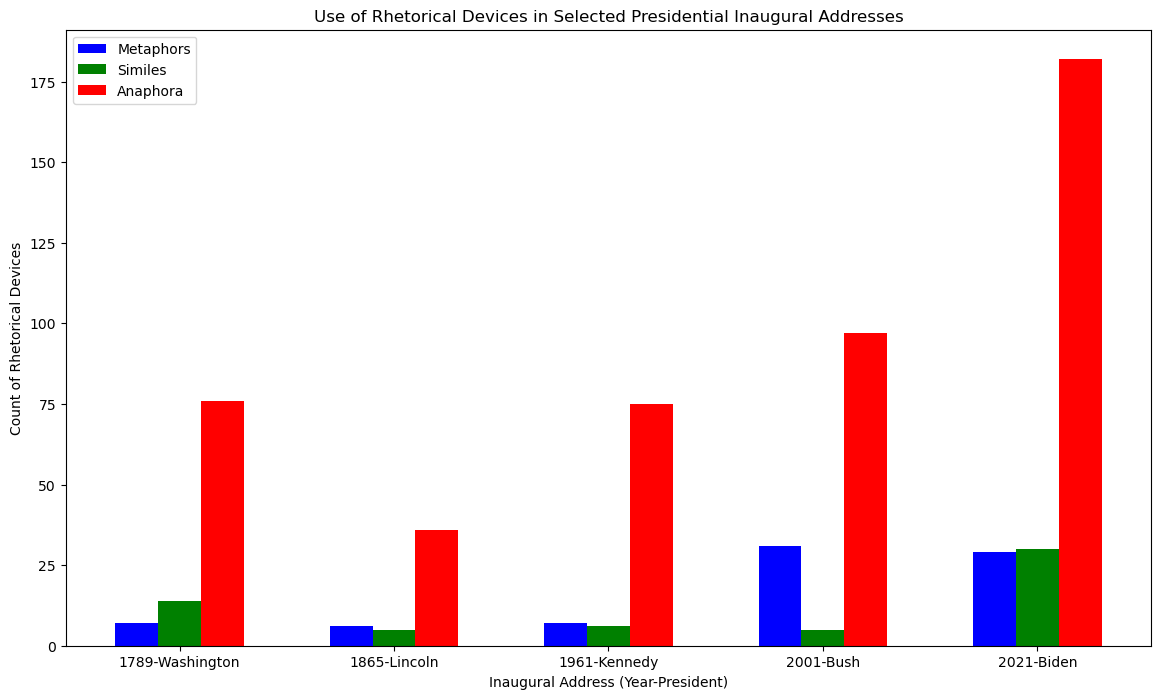

In [33]:
# Visualizing the rhetorical devices counts in selected inaugural addresses

# Prepare the data
labels = selected_years_presidents
metaphor_counts = list(metaphor_count_dict.values())
simile_counts = list(simile_count_dict.values())
anaphora_counts = list(anaphora_count_dict.values())

# Set the positions and width for the bars
x = range(len(labels))
width = 0.2

# Create the plot
plt.figure(figsize=(14, 8))
plt.bar([i - width for i in x], metaphor_counts, width=width, label='Metaphors', color='b')
plt.bar(x, simile_counts, width=width, label='Similes', color='g')
plt.bar([i + width for i in x], anaphora_counts, width=width, label='Anaphora', color='r')

# Adding labels and title
plt.xlabel('Inaugural Address (Year-President)')
plt.ylabel('Count of Rhetorical Devices')
plt.title('Use of Rhetorical Devices in Selected Presidential Inaugural Addresses')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Show the plot
plt.show()

# Step 4: Frequency of Certain Themes or Keywords

In [34]:
# Initialize a dictionary to store the keyword frequencies for each speech
keyword_freq_dict = {}

# Define the list of keywords to search for
keywords = ['freedom', 'democracy', 'america', 'peace', 'future']

# Loop through each file to count occurrences of keywords
for file in extracted_files:
    keyword_count = {}
    try:
        with open(os.path.join(extract_dir, file), 'r', encoding='utf-8') as f:
            text = f.read()
    except UnicodeDecodeError:
        # Try reading with a different encoding if UTF-8 fails
        with open(os.path.join(extract_dir, file), 'r', encoding='latin-1') as f:
            text = f.read()
            
    # Count occurrences of each keyword and store in the dictionary
    for keyword in keywords:
        keyword_count[keyword] = count_occurrences(rf'\b{keyword}\b', text.lower())
    
    keyword_freq_dict[file[:-4]] = keyword_count  # Removing '.txt' from the filename

# Sort the dictionary by year for easier visualization
keyword_freq_dict_sorted = {k: v for k, v in sorted(keyword_freq_dict.items(), key=lambda item: int(item[0].split('-')[0]))}

keyword_freq_dict_sorted

{'1789-Washington': {'freedom': 0,
  'democracy': 0,
  'america': 0,
  'peace': 0,
  'future': 2},
 '1793-Washington': {'freedom': 0,
  'democracy': 0,
  'america': 1,
  'peace': 0,
  'future': 0},
 '1797-Adams': {'freedom': 0,
  'democracy': 0,
  'america': 5,
  'peace': 5,
  'future': 1},
 '1801-Jefferson': {'freedom': 4,
  'democracy': 0,
  'america': 0,
  'peace': 5,
  'future': 1},
 '1805-Jefferson': {'freedom': 2,
  'democracy': 0,
  'america': 0,
  'peace': 4,
  'future': 2},
 '1809-Madison': {'freedom': 1,
  'democracy': 0,
  'america': 0,
  'peace': 4,
  'future': 1},
 '1813-Madison': {'freedom': 0,
  'democracy': 0,
  'america': 0,
  'peace': 0,
  'future': 0},
 '1817-Monroe': {'freedom': 0,
  'democracy': 0,
  'america': 0,
  'peace': 6,
  'future': 1},
 '1821-Monroe': {'freedom': 0,
  'democracy': 0,
  'america': 2,
  'peace': 10,
  'future': 3},
 '1825-Adams': {'freedom': 5,
  'democracy': 1,
  'america': 0,
  'peace': 9,
  'future': 4},
 '1829-Jackson': {'freedom': 1,
  '

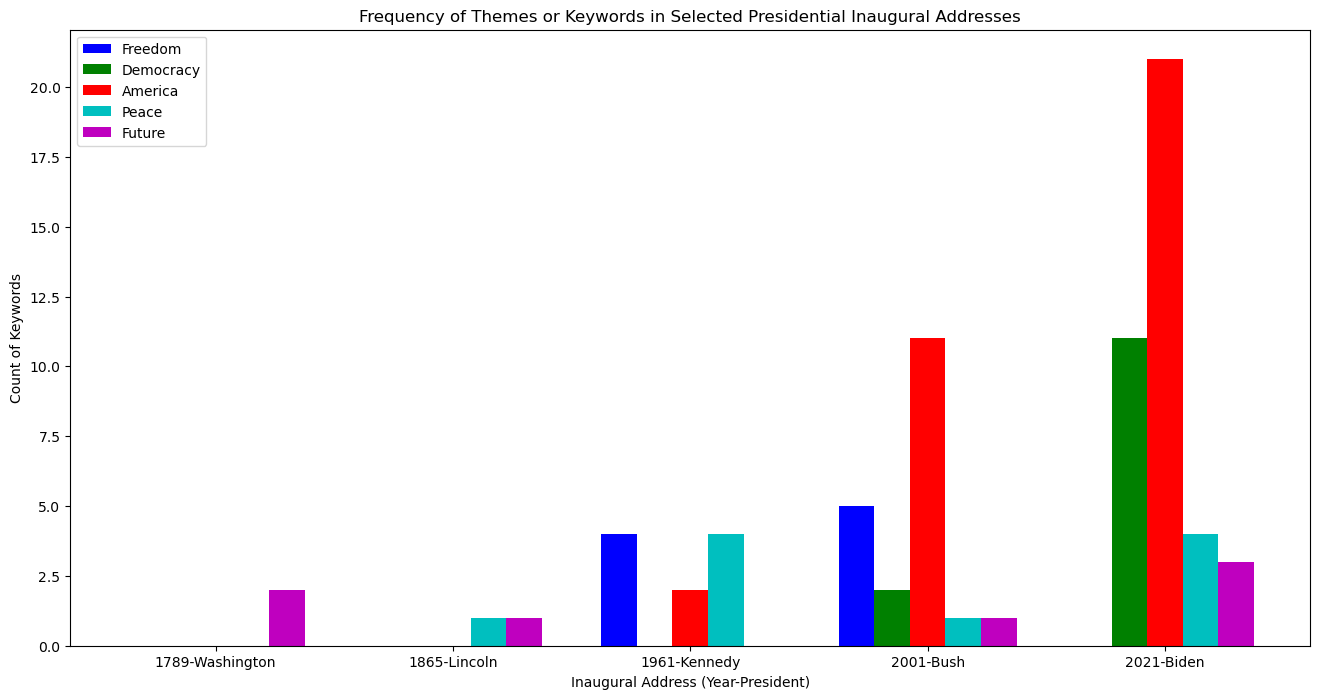

In [35]:
# Extract the keyword frequencies for the selected years and presidents
selected_keyword_freq_dict = {k: v for k, v in keyword_freq_dict.items() if k in selected_years_presidents}

# Prepare data for plotting
labels = selected_years_presidents
freedom_counts = [selected_keyword_freq_dict[label]['freedom'] for label in labels]
democracy_counts = [selected_keyword_freq_dict[label]['democracy'] for label in labels]
america_counts = [selected_keyword_freq_dict[label]['america'] for label in labels]
peace_counts = [selected_keyword_freq_dict[label]['peace'] for label in labels]
future_counts = [selected_keyword_freq_dict[label]['future'] for label in labels]

# Set the positions and width for the bars
x = range(len(labels))
width = 0.15

# Create the plot
plt.figure(figsize=(16, 8))
plt.bar([i - 2 * width for i in x], freedom_counts, width=width, label='Freedom', color='b')
plt.bar([i - width for i in x], democracy_counts, width=width, label='Democracy', color='g')
plt.bar(x, america_counts, width=width, label='America', color='r')
plt.bar([i + width for i in x], peace_counts, width=width, label='Peace', color='c')
plt.bar([i + 2 * width for i in x], future_counts, width=width, label='Future', color='m')

# Adding labels and title
plt.xlabel('Inaugural Address (Year-President)')
plt.ylabel('Count of Keywords')
plt.title('Frequency of Themes or Keywords in Selected Presidential Inaugural Addresses')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Show the plot
plt.show()

# Step 5: Sentiment Analysis

In [36]:
# Initialize a dictionary to store the sentiment scores for each selected speech
sentiment_score_dict = {}

# Predefined lists of positive and negative words
# Note: These lists are simplistic and may not capture the full range of sentiment
positive_words = ['good', 'great', 'positive', 'happy', 'hope', 'progress', 'success', 'love', 'peace']
negative_words = ['bad', 'negative', 'sad', 'fail', 'war', 'problem', 'hate', 'fear', 'crisis']

# Loop through each selected file to calculate its sentiment score
for year_president in selected_years_presidents:
    file_name = f"{year_president}.txt"
    try:
        with open(os.path.join(extract_dir, file_name), 'r', encoding='utf-8') as f:
            text = f.read()
    except UnicodeDecodeError:
        # Try reading with a different encoding if UTF-8 fails
        with open(os.path.join(extract_dir, file_name), 'r', encoding='latin-1') as f:
            text = f.read()
            
    # Tokenize the text into words
    words = re.findall(r'\b\w+\b', text.lower())
    
    # Count occurrences of positive and negative words
    positive_count = sum(count_occurrences(rf'\b{word}\b', text.lower()) for word in positive_words)
    negative_count = sum(count_occurrences(rf'\b{word}\b', text.lower()) for word in negative_words)
    
    # Calculate the sentiment score
    total_words = len(words)
    sentiment_score = (positive_count - negative_count) / total_words if total_words > 0 else 0
    
    # Store the sentiment score
    sentiment_score_dict[year_president] = sentiment_score

sentiment_score_dict

{'1789-Washington': 0.0069881201956673656,
 '1865-Lincoln': -0.009929078014184398,
 '1961-Kennedy': 0.0072992700729927005,
 '2001-Bush': 0.0056461731493099125,
 '2021-Biden': 0.00423728813559322}

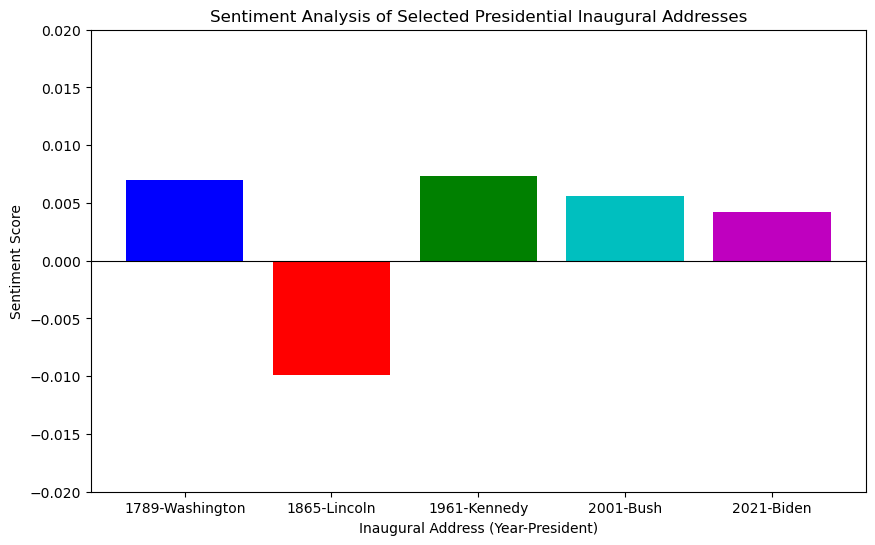

In [37]:
# Plotting the sentiment scores for the selected inaugural addresses

# Prepare data for plotting
labels = list(sentiment_score_dict.keys())
scores = list(sentiment_score_dict.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color=['b', 'r', 'g', 'c', 'm'])

# Add labels and title
plt.xlabel('Inaugural Address (Year-President)')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Selected Presidential Inaugural Addresses')
plt.ylim(-0.02, 0.02)  # Setting y-axis limits for better visualization
plt.axhline(0, color='black', linewidth=0.8)  # Add a reference line at y=0

# Show the plot
plt.show()